In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [2]:
def winpercentages(env="ConnectFour", t1=1.0, t2=1.0, c1=1.0, c2=1.0, e1=0.01, e2=0.01, treepolicy1="ucb", treepolicy2="ucb"):
    if treepolicy1 == "epsilon_greedy" and treepolicy2 == "epsilon_greedy":
        filename = f"{env}-e{e1}t{t1}-e{e2}t{t2}.csv"
    elif treepolicy1 == "epsilon_greedy" and treepolicy2 == "ucb":
        filename = f"{env}-e{e1}t{t1}-c{c2}t{t2}.csv"
    elif treepolicy1 == "ucb" and treepolicy2 == "epsilon_greedy":
        filename = f"{env}-c{c1}t{t1}-e{e2}t{t2}.csv"
    elif treepolicy1 == "ucb" and treepolicy2 == "ucb":
        filename = f"{env}-c{c1}t{t1}-c{c2}t{t2}.csv"
    df=pd.read_csv(filename)
    return np.mean(df.Agent1==1.0), np.mean(df.Agent2==1.0), np.mean(df.Steps)

In [3]:
'''Information about one specific agent against another specific agent'''

df=pd.read_csv("ConnectFour-e0.09t1.0-c1.3t1.0.csv")
print(df)
print(df.describe())
w,l,s = winpercentages(env="ConnectFour", t1=1.0,t2=1.0,e1=0.09,c2=1.3,treepolicy1="epsilon_greedy",treepolicy2="ucb")
print("Agent 1 win percetage = ", 100*w)
print("Agent 2 win percetage = ", 100*l)
print("Average length of game (in number of steps) = ", s)

     Agent1  Agent2  Steps
0       1.0    -1.0     23
1      -1.0     1.0     34
2      -1.0     1.0     16
3      -1.0     1.0     32
4      -1.0     1.0     38
..      ...     ...    ...
495     1.0    -1.0     27
496    -1.0     1.0     22
497    -1.0     1.0     36
498     1.0    -1.0     33
499     1.0    -1.0     31

[500 rows x 3 columns]
          Agent1     Agent2       Steps
count  500.00000  500.00000  500.000000
mean    -0.31400    0.31400   32.538000
std      0.92364    0.92364    6.566185
min     -1.00000   -1.00000    8.000000
25%     -1.00000   -1.00000   29.000000
50%     -1.00000    1.00000   34.000000
75%      1.00000    1.00000   37.000000
max      1.00000    1.00000   42.000000
Agent 1 win percetage =  31.8
Agent 2 win percetage =  63.2
Average length of game (in number of steps) =  32.538


In [4]:
ucbs = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
epss = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10]

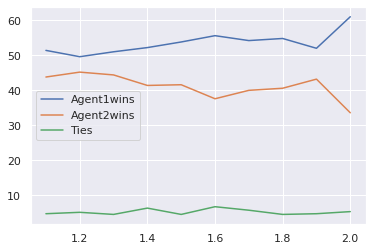

In [5]:
"Fixed agent 1 with ucb tree policy against varying agent 2 with ucb tree policy"

c1=1.3
w1list=[]
w2list=[]
slist=[]
tielist=[]
for c2 in ucbs:
    w1,w2,s=winpercentages(c1=c1,c2=c2,treepolicy1="ucb",treepolicy2="ucb")
    w1list.append(w1)
    w2list.append(w2)
    slist.append(s)
    tielist.append(1-w1-w2)
plt.plot(ucbs,100*np.array(w1list),label="Agent1wins")
plt.plot(ucbs,100*np.array(w2list),label="Agent2wins")
plt.plot(ucbs,100*np.array(tielist),label="Ties")
plt.legend()

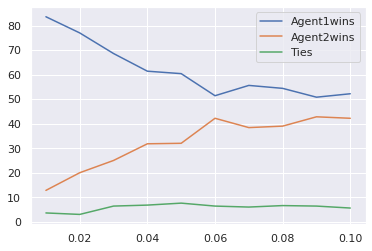

In [6]:
"Fixed agent 1 with epsilon_greedy tree policy against varying agent 2 with epsilon_greedy tree policy"

e1=0.09
w1list=[]
w2list=[]
slist=[]
tielist=[]
for e2 in epss:
    w1,w2,s=winpercentages(e1=e1,e2=e2,treepolicy1="epsilon_greedy",treepolicy2="epsilon_greedy")
    w1list.append(w1)
    w2list.append(w2)
    slist.append(s)
    tielist.append(1-w1-w2)
plt.plot(epss,100*np.array(w1list),label="Agent1wins")
plt.plot(epss,100*np.array(w2list),label="Agent2wins")
plt.plot(epss,100*np.array(tielist),label="Ties")
plt.legend()

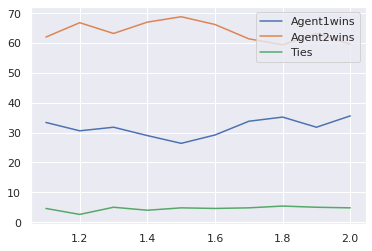

In [7]:
"Fixed agent 1 with epsilon_greedy tree policy against varying agent 2 with ucb tree policy"

e1=0.09
w1list=[]
w2list=[]
slist=[]
tielist=[]
for c2 in ucbs:
    w1,w2,s=winpercentages(e1=e1,c2=c2,treepolicy1="epsilon_greedy",treepolicy2="ucb")
    w1list.append(w1)
    w2list.append(w2)
    slist.append(s)
    tielist.append(1-w1-w2)
plt.plot(ucbs,100*np.array(w1list),label="Agent1wins")
plt.plot(ucbs,100*np.array(w2list),label="Agent2wins")
plt.plot(ucbs,100*np.array(tielist),label="Ties")
plt.legend()

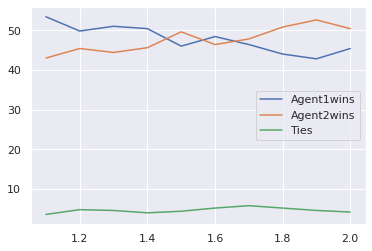

In [8]:
"Varying agent 1 with ucb tree policy against fixed agent 2 with ucb tree policy"

c2=1.3
w1list=[]
w2list=[]
slist=[]
tielist=[]
for c1 in ucbs:
    w1,w2,s=winpercentages(c1=c1,c2=c2,treepolicy1="ucb",treepolicy2="ucb")
    w1list.append(w1)
    w2list.append(w2)
    slist.append(s)
    tielist.append(1-w1-w2)
plt.plot(ucbs,100*np.array(w1list),label="Agent1wins")
plt.plot(ucbs,100*np.array(w2list),label="Agent2wins")
plt.plot(ucbs,100*np.array(tielist),label="Ties")
plt.legend()

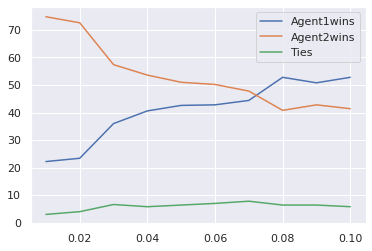

In [9]:
"Varying agent 1 with epsilon_greedy tree policy against fixed agent 2 with epsilon_greedy tree policy"

e2=0.09
w1list=[]
w2list=[]
slist=[]
tielist=[]
for e1 in epss:
    w1,w2,s=winpercentages(e1=e1,e2=e2,treepolicy1="epsilon_greedy",treepolicy2="epsilon_greedy")
    w1list.append(w1)
    w2list.append(w2)
    slist.append(s)
    tielist.append(1-w1-w2)
plt.plot(epss,100*np.array(w1list),label="Agent1wins")
plt.plot(epss,100*np.array(w2list),label="Agent2wins")
plt.plot(epss,100*np.array(tielist),label="Ties")
plt.legend()

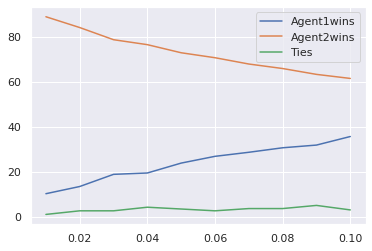

In [10]:
"Varying agent 1 with epsilon_greedy tree policy against fixed agent 2 with ucb tree policy"

c2=1.3
w1list=[]
w2list=[]
slist=[]
tielist=[]
for e1 in epss:
    w1,w2,s=winpercentages(e1=e1,c2=c2,treepolicy1="epsilon_greedy",treepolicy2="ucb")
    w1list.append(w1)
    w2list.append(w2)
    slist.append(s)
    tielist.append(1-w1-w2)
plt.plot(epss,100*np.array(w1list),label="Agent1wins")
plt.plot(epss,100*np.array(w2list),label="Agent2wins")
plt.plot(epss,100*np.array(tielist),label="Ties")
plt.legend()

In [11]:
arr1 = np.zeros(shape=(len(epss),len(epss)))
arr2 = np.zeros(shape=(len(epss),len(epss)))
arr3 = np.zeros(shape=(len(epss),len(epss)))
for i,e1 in enumerate(epss):
    for j,e2 in enumerate(epss):
        arr1[i,j],arr2[i,j],arr3[i,j] = winpercentages(e1=e1,e2=e2,treepolicy1="epsilon_greedy",treepolicy2="epsilon_greedy")

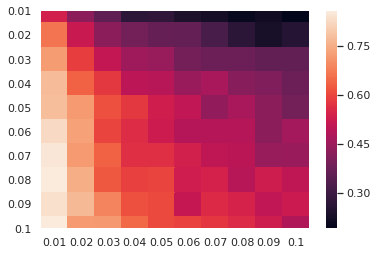

In [12]:
sns.heatmap(pd.DataFrame(arr1,index=epss,columns=epss))

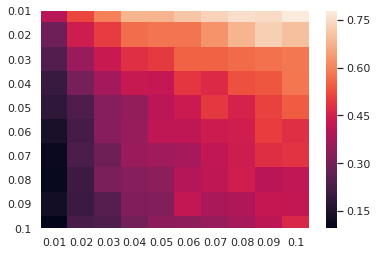

In [13]:
sns.heatmap(pd.DataFrame(arr2,index=epss,columns=epss))

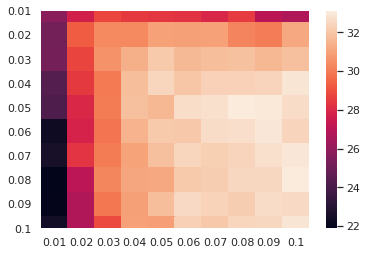

In [14]:
sns.heatmap(pd.DataFrame(arr3,index=epss,columns=epss))

In [15]:
arr1 = np.zeros(shape=(len(ucbs),len(ucbs)))
arr2 = np.zeros(shape=(len(ucbs),len(ucbs)))
arr3 = np.zeros(shape=(len(ucbs),len(ucbs)))
for i,c1 in enumerate(ucbs):
    for j,c2 in enumerate(ucbs):
        arr1[i,j],arr2[i,j],arr3[i,j] = winpercentages(c1=c1,c2=c2,treepolicy1="ucb",treepolicy2="ucb")

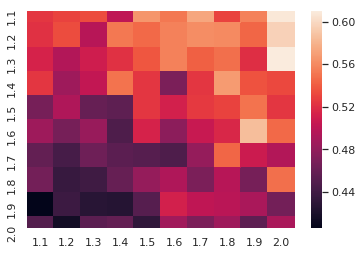

In [16]:
sns.heatmap(pd.DataFrame(arr1,index=ucbs,columns=ucbs))

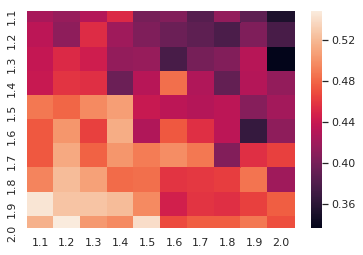

In [17]:
sns.heatmap(pd.DataFrame(arr2,index=ucbs,columns=ucbs))

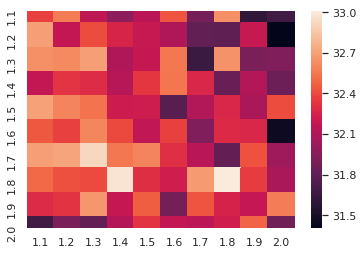

In [18]:
sns.heatmap(pd.DataFrame(arr3,index=ucbs,columns=ucbs))

In [19]:
arr1 = np.zeros(shape=(len(epss),len(ucbs)))
arr2 = np.zeros(shape=(len(epss),len(ucbs)))
arr3 = np.zeros(shape=(len(epss),len(ucbs)))
for i,e1 in enumerate(epss):
    for j,c2 in enumerate(ucbs):
        arr1[i,j],arr2[i,j],arr3[i,j] = winpercentages(e1=e1,c2=c2,treepolicy1="epsilon_greedy",treepolicy2="ucb")

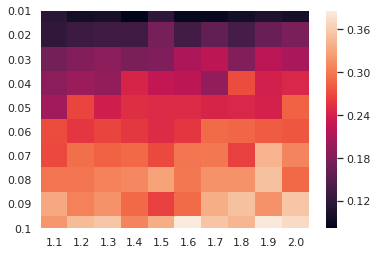

In [20]:
sns.heatmap(pd.DataFrame(arr1,index=epss,columns=ucbs))

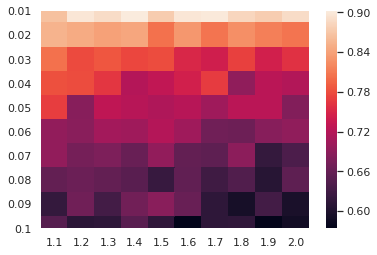

In [21]:
sns.heatmap(pd.DataFrame(arr2,index=epss,columns=ucbs))

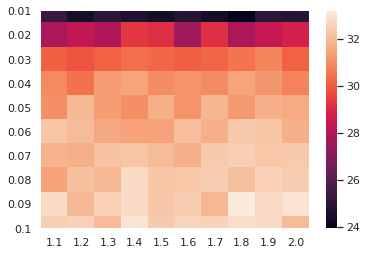

In [22]:
sns.heatmap(pd.DataFrame(arr3,index=epss,columns=ucbs))